In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('Fraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
data.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1902386530,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


In [9]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [10]:
data.shape

(6362620, 11)

In [11]:
missing_columns = [col for col in data.columns if data[col].isnull().sum()>0]
missing_columns

[]

In [12]:
data.isnull().sum().max()

0

In [13]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [14]:
data = data.sample(n=1600000, random_state = 0)

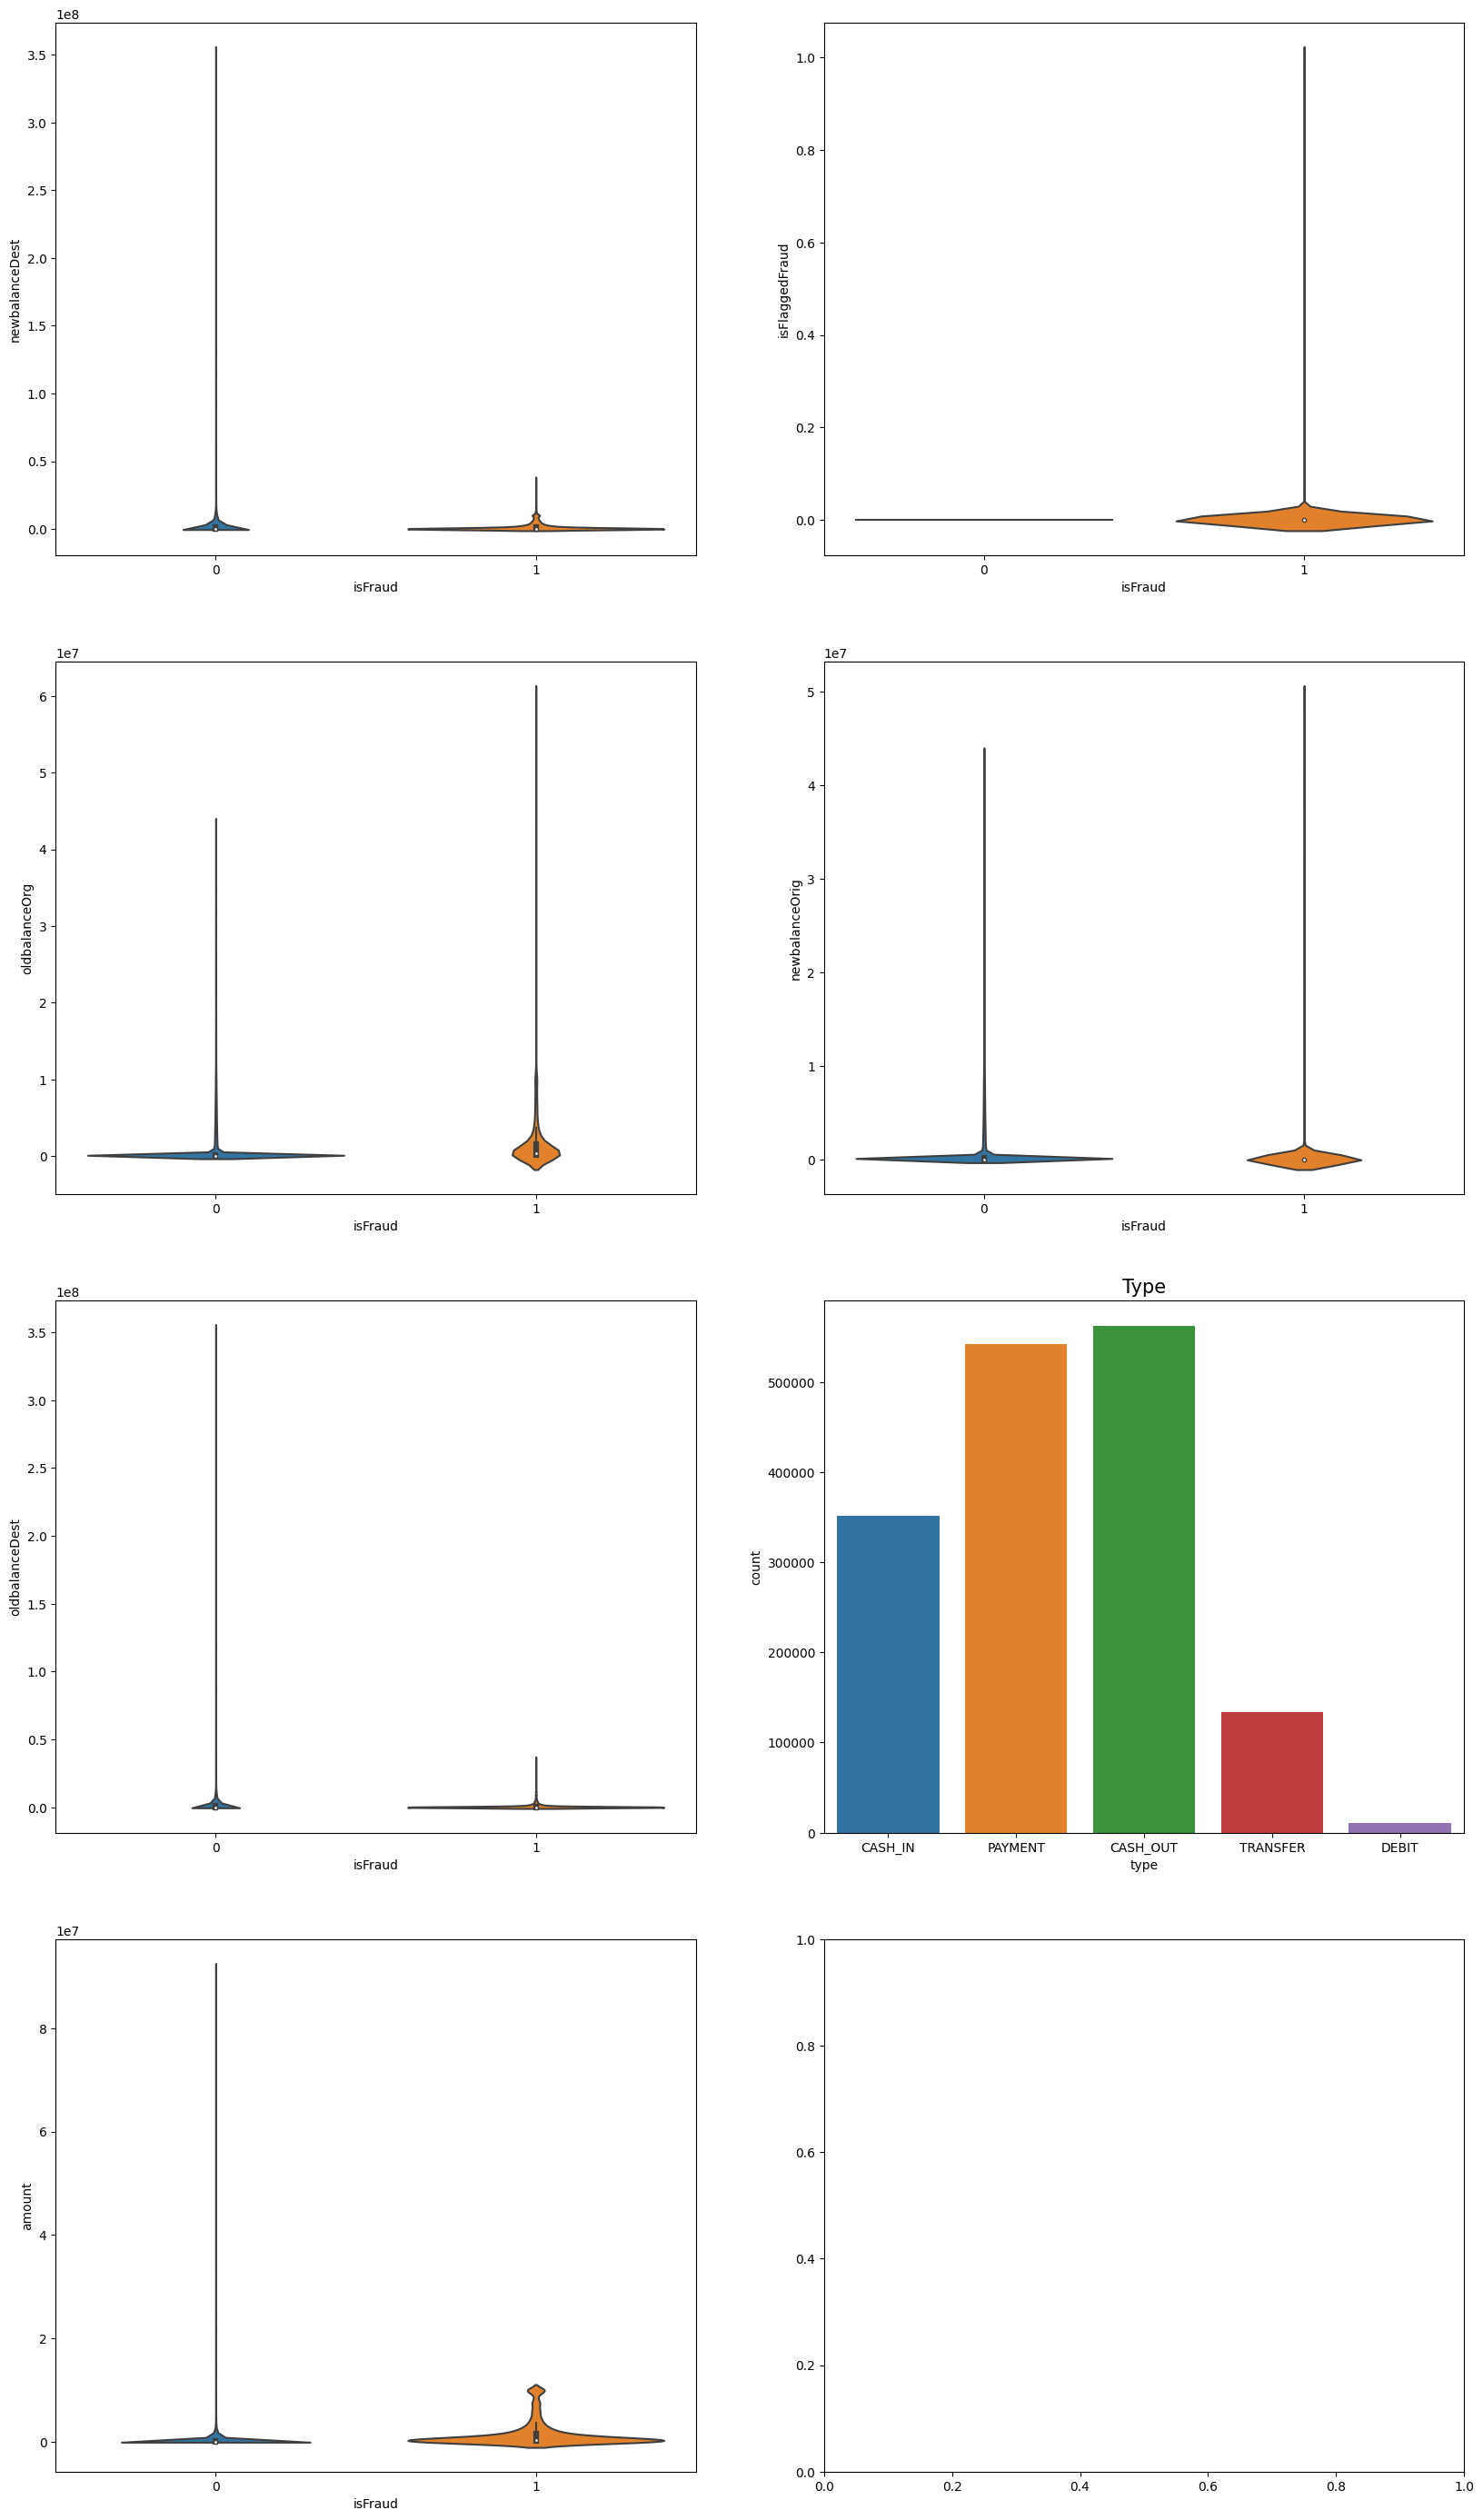

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 35))

# Violin Plots
sns.violinplot(x=data.isFraud, y=data['newbalanceDest'], ax=axes[0, 0])
sns.violinplot(x=data.isFraud, y=data['isFlaggedFraud'], ax=axes[0, 1])
sns.violinplot(x=data.isFraud, y=data['oldbalanceOrg'], ax=axes[1, 0])
sns.violinplot(x=data.isFraud, y=data['newbalanceOrig'], ax=axes[1, 1])
sns.violinplot(x=data.isFraud, y=data['oldbalanceDest'], ax=axes[2, 0])

sns.countplot(x=data.type, ax=axes[2, 1]).set_title('Type', size=15)
sns.violinplot(x=data.isFraud, y=data['amount'], ax=axes[3, 0])

plt.show()


In [16]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_with_isFraud = data[numerical_columns].corr()['isFraud'].sort_values()
print(correlation_with_isFraud)


newbalanceOrig   -0.007273
oldbalanceDest   -0.006177
newbalanceDest    0.000251
oldbalanceOrg     0.011338
step              0.034063
isFlaggedFraud    0.054172
amount            0.077936
isFraud           1.000000
Name: isFraud, dtype: float64


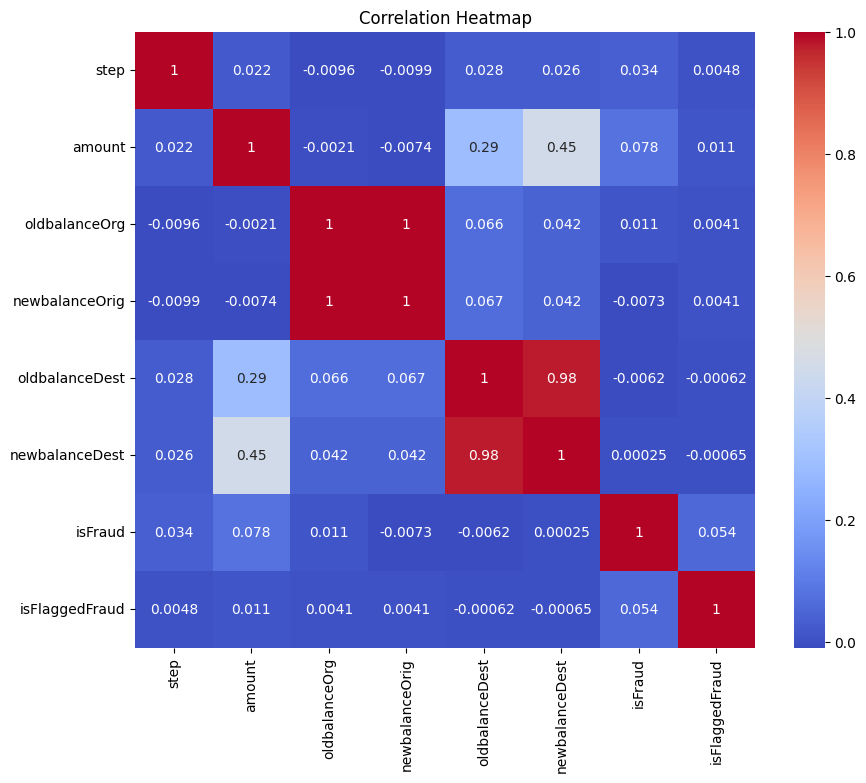

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns only
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation between numerical columns
correlation_matrix = data[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [18]:
data["isFraud"].value_counts()

isFraud
0    1597958
1       2042
Name: count, dtype: int64

In [19]:
data["type"].value_counts()

type
CASH_OUT    562373
PAYMENT     541995
CASH_IN     351153
TRANSFER    134006
DEBIT        10473
Name: count, dtype: int64

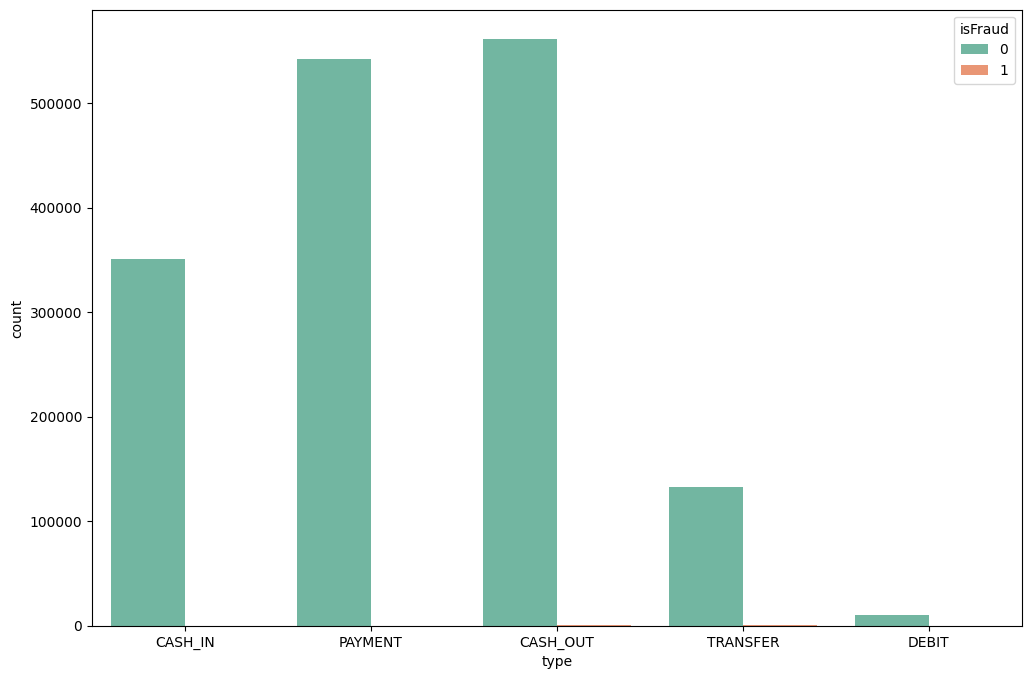

In [26]:
plt.figure(figsize=(12, 8))
sns.countplot(x="type", data=data, hue="isFraud", palette="Set2")
plt.show()


In [28]:
data["step"].value_counts().sort_values(ascending=False).head()

step
19     12922
18     12295
187    12293
235    11855
163    11676
Name: count, dtype: int64

In [29]:
data.select_dtypes(include=["object"]).columns

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [31]:
data.drop(["nameOrig","nameDest"],axis=1,inplace=True)

In [32]:
Fraud=data[data['isFraud']=='1']
Valid=data[data['isFraud']=='0']

In [33]:
data.drop(["isFlaggedFraud"],axis=1,inplace=True)

In [34]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
4644207,330,CASH_IN,607193.64,15458649.28,16065842.92,3394537.70,2787344.06,0
3800666,281,PAYMENT,3473.75,0.00,0.00,0.00,0.00,0
4426240,322,CASH_OUT,66170.69,32803.00,0.00,0.00,66170.69,0
5788765,401,TRANSFER,335384.26,197.00,0.00,5311958.61,5647342.87,0
2010701,180,CASH_IN,234392.25,20882.00,255274.25,0.00,0.00,0


In [39]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data["type"] = label.fit_transform(data["type"])

In [40]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
4644207,330,0,607193.64,15458649.28,16065842.92,3394537.70,2787344.06,0
3800666,281,3,3473.75,0.00,0.00,0.00,0.00,0
4426240,322,1,66170.69,32803.00,0.00,0.00,66170.69,0
5788765,401,4,335384.26,197.00,0.00,5311958.61,5647342.87,0
2010701,180,0,234392.25,20882.00,255274.25,0.00,0.00,0


In [41]:
from sklearn.model_selection import train_test_split
X=data.drop("isFraud",axis=1)
y=data["isFraud"]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [44]:
cols = X_train.columns
cols

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest'],
      dtype='object')

In [47]:
X_train_scaled=scaler.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled,columns=cols)
X_train_scaled.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0.125337,0.00,0.000030,0.001756,0.002165,0.002186,0.002177
1,0.411051,0.75,0.000104,0.000250,0.000107,0.000000,0.000000
2,0.215633,0.25,0.003088,0.000003,0.000000,0.000378,0.001675
3,0.212938,0.25,0.001884,0.000051,0.000000,0.003486,0.003974
4,0.055256,0.75,0.000015,0.000000,0.000000,0.000000,0.000000


In [48]:
X_test_scaled=scaler.fit_transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=cols)
X_test_scaled.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0.444595,0.25,0.005079,0.000358,0.000000,0.000000,0.000890
1,0.408108,0.25,0.004578,0.000000,0.000000,0.011164,0.011592
2,0.013514,0.00,0.006245,0.115818,0.123654,0.001398,0.000257
3,0.340541,0.25,0.001032,0.000000,0.000000,0.002601,0.002695
4,0.708108,0.25,0.000862,0.000000,0.000000,0.003209,0.003253


In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction,train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label,prediction, output_dict=True))
        print(f"Accuracy_score:{accuracy_score(label,prediction)*100:.4f}%")
        print(f"classification_report:\n{clf_report}")
        print(f"Confusion Matrix: \n{confusion_matrix(y_train,prediction)}\n")
    elif train == False:
        clf_report = pd.DataFrame(classification_report(label,prediction,output_dict=True))
        print(f"Accuracy_score:{accuracy_score(label,prediction)*100:.4f}%")
        print(f"classification_report:\n{clf_report}")
        print(f"Confusion Matrix: \n{confusion_matrix(label,prediction)}\n")

In [58]:
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import f1_score

logreg = LogReg()
logreg.fit(X_train,y_train)

LogisticRegression()

In [59]:
lr_train_pred=logreg.predict(X_train)
lr_test_pred=logreg.predict(X_test)
print_score(y_train,lr_train_pred,train=True)
print_score(y_test,lr_test_pred, train=False)

Accuracy_score:99.9081%
classification_report:
                      0            1  accuracy     macro avg  weighted avg
precision  9.991777e-01     0.819767  0.999081  9.094726e-01  9.989512e-01
recall     9.999030e-01     0.349010  0.999081  6.744565e-01  9.990813e-01
f1-score   9.995402e-01     0.489583  0.999081  7.445618e-01  9.988964e-01
support    1.278384e+06  1616.000000  0.999081  1.280000e+06  1.280000e+06
Confusion Matrix: 
[[1278260     124]
 [   1052     564]]

Accuracy_score:99.9056%
classification_report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999165    0.819588  0.999056       0.909376       0.998926
recall          0.999890    0.373239  0.999056       0.686565       0.999056
f1-score        0.999528    0.512903  0.999056       0.756215       0.998880
support    319574.000000  426.000000  0.999056  320000.000000  320000.000000
Confusion Matrix: 
[[319539     35]
 [   267    159]]



In [60]:
logreg.coef_

array([[-4.18051154e-03, -1.82004706e+00, -4.66331226e-05,
         5.91491468e-05, -6.26960153e-05,  6.37829030e-06,
        -7.77110981e-06]])

Text(0.5, 1.0, 'Coefficient plot')

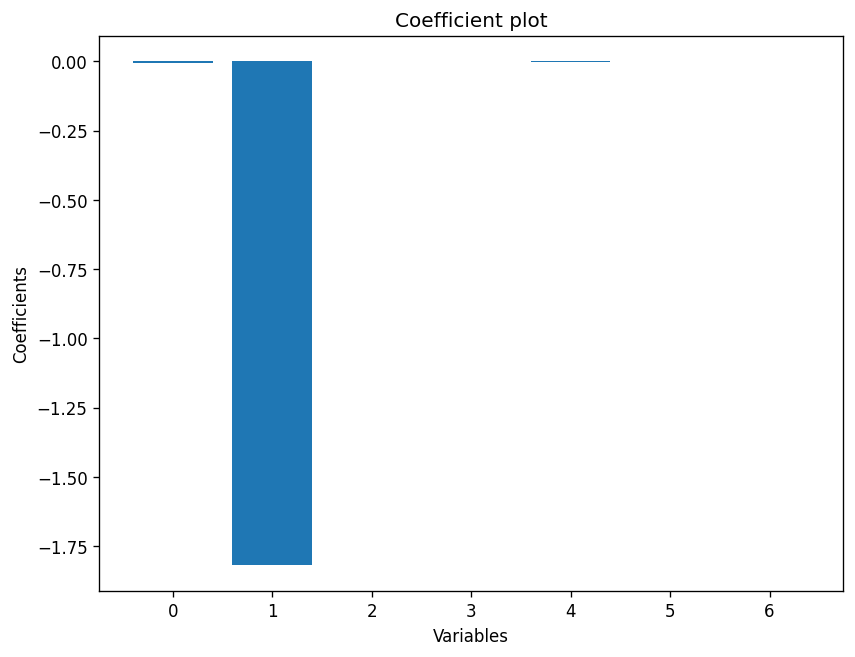

In [62]:
plt.figure(figsize=(8,6),dpi=120,facecolor='w',edgecolor='b')
x=range(len(X_train.columns))
c=logreg.coef_.reshape(-1)
plt.bar( x, c )
plt.xlabel("Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [64]:
Coefficients = pd.DataFrame({
    'Variable': X_train.columns,
    'coefficient':abs(c)})
Coefficients.head()

,Variable,coefficient
0,step,0.004181
1,type,1.820047
2,amount,0.000047
3,oldbalanceOrg,0.000059
4,newbalanceOrig,0.000063


In [65]:
sig_var=Coefficients[Coefficients.coefficient > 0.3]

In [66]:
subset = data[sig_var['Variable'].values]
subset.head()

,type
4644207,0
3800666,3
4426240,1
5788765,4
2010701,0


In [69]:
from xgboost import XGBClassifier
from matplotlib import pyplot
xgb_clf=XGBClassifier()
xgb_clf.fit(X_train,y_train,eval_metric='aucpr')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [70]:
xgb_train_pred=xgb_clf.predict(X_train)
xgb_test_pred=xgb_clf.predict(X_test)
print_score(y_train,xgb_train_pred,train=True)
print_score(y_test,xgb_test_pred,train=False)

Accuracy_score:99.9942%
classification_report:
                      0            1  accuracy     macro avg  weighted avg
precision  9.999445e-01     0.998062  0.999942  9.990032e-01  9.999421e-01
recall     9.999977e-01     0.956064  0.999942  9.780310e-01  9.999422e-01
f1-score   9.999711e-01     0.976612  0.999942  9.882915e-01  9.999416e-01
support    1.278384e+06  1616.000000  0.999942  1.280000e+06  1.280000e+06
Confusion Matrix: 
[[1278381       3]
 [     71    1545]]

Accuracy_score:99.9750%
classification_report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999772    0.980556   0.99975       0.990164       0.999746
recall          0.999978    0.828638   0.99975       0.914308       0.999750
f1-score        0.999875    0.898219   0.99975       0.949047       0.999740
support    319574.000000  426.000000   0.99975  320000.000000  320000.000000
Confusion Matrix: 
[[319567      7]
 [    73    353]]



In [71]:
print(xgb_clf.feature_importances_)

[0.04061526 0.15040301 0.0610203  0.16642302 0.27455947 0.09492078
 0.21205819]
